# 1.基本原理

## 1.1 发起请求
发送Request（包含额外header信息），等待服务器响应
## 1.2 获取响应内容
服务器正常响应，获得Response（所获取的页面内容：HTML、Json字符串、二进制数据（图片/视频））
## 1.3 解析内容
HTML：页面解析库、正则表达式
Json：Json对象解析
二进制数据：进一步处理
## 1.4 保存数据
文本、数据库、特定格式

## 1.5 一个简单的爬虫（来自ChatGPT）
爬取网页标题

In [2]:
pip install requests

                                              0.0/62.6 kB ? eta -:--:--
     ------                                   10.2/62.6 kB ? eta -:--:--
     ------                                   10.2/62.6 kB ? eta -:--:--
     ------                                   10.2/62.6 kB ? eta -:--:--
     ------                                   10.2/62.6 kB ? eta -:--:--
     ------                                   10.2/62.6 kB ? eta -:--:--
     ------------                            20.5/62.6 kB 46.8 kB/s eta 0:00:01
     ------------                            20.5/62.6 kB 46.8 kB/s eta 0:00:01
     -------------------                     30.7/62.6 kB 65.6 kB/s eta 0:00:01
     -------------------                     30.7/62.6 kB 65.6 kB/s eta 0:00:01
     -------------------------------------- 62.6/62.6 kB 128.9 kB/s eta 0:00:00
                                              0.0/97.1 kB ? eta -:--:--
                                              0.0/97.1 kB ? eta -:--:--
                   

In [12]:
import requests
from bs4 import BeautifulSoup

# 发送HTTP请求获取网页内容
url = "https://www.bilibili.com"
response = requests.get(url)
html_content = response.text

# 解析HTML内容
soup = BeautifulSoup(html_content, "html.parser")

# 提取数据
# 在这里，你可以使用Beautiful Soup的方法和CSS选择器来定位和提取所需的HTML元素
# 这里以提取网页标题为例
title_element = soup.select_one("title")
if title_element:
    title = title_element.text
    print("网页标题：", title) 
    # 数据存储
    # 在这里，你可以将提取的数据保存到本地文件或数据库中
    # 这里以保存到文本文件为例
    with open("output1.txt","w",encoding="utf-8") as file:
        file.write(f"网页标题：{title}")
    print("Overed")
else:
    print("failed")

网页标题： 验证码_哔哩哔哩
Overed


## 1.6 爬取新闻标题与链接（来自ChatGPT）
有一些问题，比如css标签似乎有误导致无法爬取正确内容

In [45]:
import requests
from bs4 import BeautifulSoup

url = "https://s.weibo.com/top/summary"
response = requests.get(url)
html_content = response.text

#解析HTML内容
soup = BeautifulSoup(html_content, "html.parser")

# 提取数据内容
hot_elements = soup.select("#pl_top_realtimehot > table > tbody > tr > td.td-02 > a")
hot_list = []

for hot_element in hot_elements:
    title = hot_element.text.strip()
    link = hot_element.get("href")
    if link.startswith("https://") or link.startswith("//"):
        pass
    else:
        link = "https://s.weibo.com" + link
    
#     if link.startswith("https://"):
#         # 链接是绝对路径，直接使用
#     else:
#         # 链接是相对路径，需要拼接域名
#         link = "https://s.weibo.com" + link # 这一行需要缩进

    hot = {
        "title": title,
        "link": link
    }
    
    hot_list.append(hot)

# 打印数据
for hot in hot_list:
    print("热搜标题:", hot["title"])
    print("链接:", hot["link"])
    print()
    
# 存储数据
with open("output2.txt","w",encoding="utf-8") as file:
    for hot in hot_list:
        file.write(f"热搜标题：{hot['title']}\n")
        file.write(f"链接：{hot['link']}\n")
        file.write("\n")
        
print("Overed")

Overed


# 2.简单爬虫架构
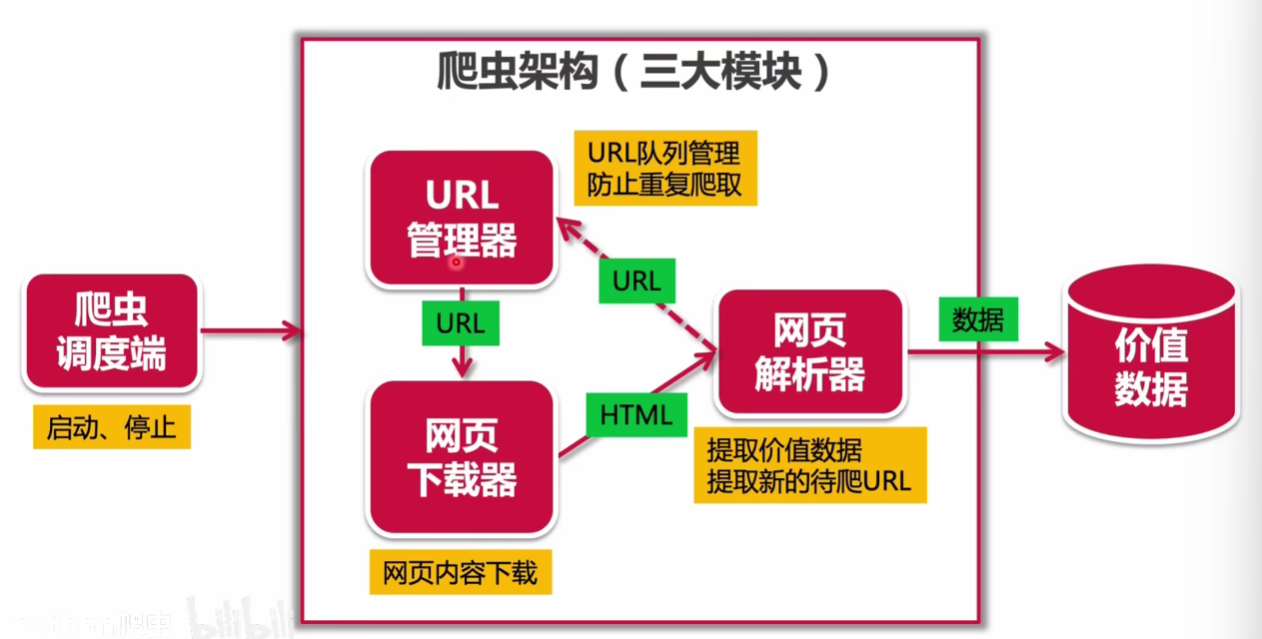

# 3.Requests网页下载库
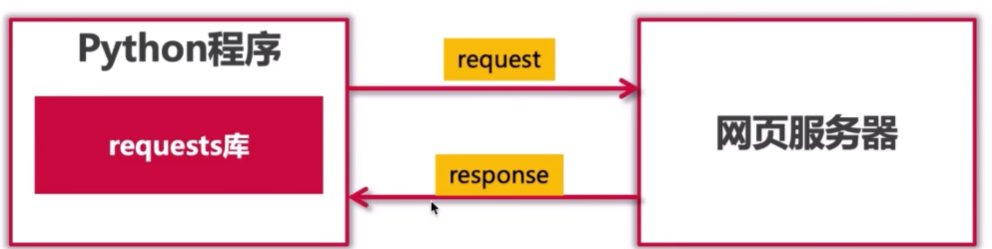

## 3.1 发送request请求
```requests.get/post(url,params,data,headers,timeout,verify,allow_redirects,cookies)```

- url 要下载的目标网页的url
- params 字典形式，设置url后面的参数
- data 字典/字符串，用于post方法提交数据
- headers 设置user-agent/refer等请求头
- timeout 超时时间（单位是秒）
- verify:True/False 是否进行HTTPS证书验证，默认是需要自己设置证书地址
- allow_redirects:True/False 是否让requests做重定向处理（默认是）
- cookies：附带本地的cookies数据

## 3.2 接受response响应
```r = requests.get/post(url)```

// 查看状态码如果等于200代表请求成功
 - r.status_code

// 查看当前编码以及变更编码（requests会根据headers推测编码，推测不到则设置为ISO-8859-1导致乱码)
- r.encoding

// 查看返回的网页内容
- r.text

// 查看返回的http的headers
- r.headers

// 查看实际访问的URL
- r.url

// 以字节的方式返回内容（比如用于下载图片）
- r.content

// 服务端写入本地的cookies数据
- r.cookies

## 3.3 使用request s爬取网页内容

In [4]:
import requests
url = "http://www.crazyant.net"
r = requests.get(url)
r.status_code

200

In [5]:
r.headers

{'Connection': 'close', 'Transfer-Encoding': 'chunked', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html; charset=UTF-8', 'Date': 'Wed, 28 Jun 2023 14:07:26 GMT', 'Link': '<http://www.crazyant.net/wp-json/>; rel="https://api.w.org/"', 'Server': 'nginx', 'Vary': 'Accept-Encoding', 'X-Ua-Compatible': 'IE=edge'}

In [6]:
r.encoding

'UTF-8'

In [7]:
r.text

'<!DOCTYPE html>\n<html lang="zh-CN">\n<head>\n\t<meta charset="UTF-8">\n\t<link rel="profile" href="https://gmpg.org/xfn/11">\n\t<title>蚂蚁学Python &#8211; 你有没有为写代码拼过命？那你知不知道 人生苦短，我用Python？</title>\n<meta name=\'robots\' content=\'max-image-preview:large\' />\n<link rel=\'dns-prefetch\' href=\'//www.crazyant.net\' />\n<link rel=\'dns-prefetch\' href=\'//cdn.bibblio.org\' />\n<link rel=\'dns-prefetch\' href=\'//fonts.googleapis.com\' />\n<link href=\'https://fonts.gstatic.com\' crossorigin rel=\'preconnect\' />\n<link rel="alternate" type="application/rss+xml" title="蚂蚁学Python &raquo; Feed" href="http://www.crazyant.net/feed" />\n<link rel="alternate" type="application/rss+xml" title="蚂蚁学Python &raquo; 评论Feed" href="http://www.crazyant.net/comments/feed" />\n<script>\nwindow._wpemojiSettings = {"baseUrl":"https:\\/\\/s.w.org\\/images\\/core\\/emoji\\/14.0.0\\/72x72\\/","ext":".png","svgUrl":"https:\\/\\/s.w.org\\/images\\/core\\/emoji\\/14.0.0\\/svg\\/","svgExt":".svg","source":{"concate

In [8]:
r.cookies

<RequestsCookieJar[]>

In [9]:
url = "https://www.baidu.com"
r = requests.get(url)

In [10]:
r.status_code

200

In [11]:
r.headers

{'Cache-Control': 'private, no-cache, no-store, proxy-revalidate, no-transform', 'Connection': 'keep-alive', 'Content-Encoding': 'gzip', 'Content-Type': 'text/html', 'Date': 'Wed, 28 Jun 2023 14:07:33 GMT', 'Last-Modified': 'Mon, 23 Jan 2017 13:23:55 GMT', 'Pragma': 'no-cache', 'Server': 'bfe/1.0.8.18', 'Set-Cookie': 'BDORZ=27315; max-age=86400; domain=.baidu.com; path=/', 'Transfer-Encoding': 'chunked'}

In [55]:
r.text

'<!DOCTYPE html>\r\n<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>ç\x99¾åº¦ä¸\x80ä¸\x8bï¼\x8cä½\xa0å°±ç\x9f¥é\x81\x93</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off au

In [56]:
r.encoding="utf-8"

In [57]:
r.text

'<!DOCTYPE html>\r\n<!--STATUS OK--><html> <head><meta http-equiv=content-type content=text/html;charset=utf-8><meta http-equiv=X-UA-Compatible content=IE=Edge><meta content=always name=referrer><link rel=stylesheet type=text/css href=https://ss1.bdstatic.com/5eN1bjq8AAUYm2zgoY3K/r/www/cache/bdorz/baidu.min.css><title>百度一下，你就知道</title></head> <body link=#0000cc> <div id=wrapper> <div id=head> <div class=head_wrapper> <div class=s_form> <div class=s_form_wrapper> <div id=lg> <img hidefocus=true src=//www.baidu.com/img/bd_logo1.png width=270 height=129> </div> <form id=form name=f action=//www.baidu.com/s class=fm> <input type=hidden name=bdorz_come value=1> <input type=hidden name=ie value=utf-8> <input type=hidden name=f value=8> <input type=hidden name=rsv_bp value=1> <input type=hidden name=rsv_idx value=1> <input type=hidden name=tn value=baidu><span class="bg s_ipt_wr"><input id=kw name=wd class=s_ipt value maxlength=255 autocomplete=off autofocus=autofocus></span><span class="bg s

# 4.URL管理器
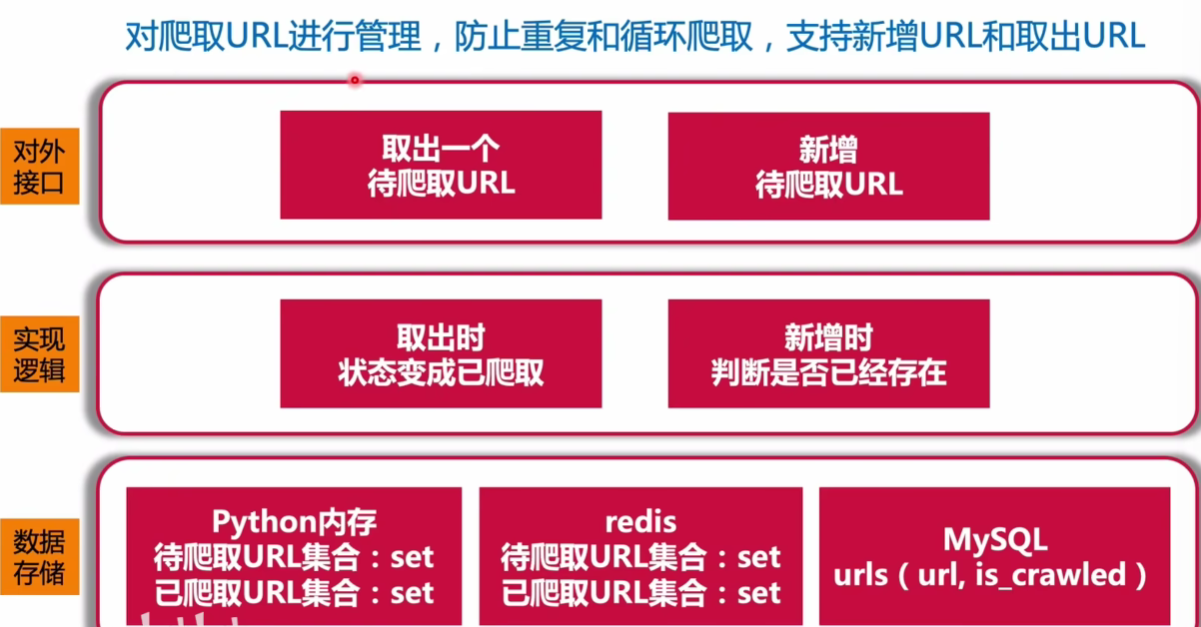

In [1]:
class UrlManager():
    """url管理器"""
    def __init__(self):
        self.new_urls = set()
        self.old_urls = set()

    def add_new_url(self, url):
        if url is None or len(url) == 0:
            return
        if url in self.new_urls or url in self.old_urls:
            return
        self.new_urls.add(url)

    def add_new_urls(self, *urls):
        if urls is None or len(urls) == 0:
            return
        for url in urls:
            self.add_new_url(url)

    def get_url(self):
        if self.has_new_url():
            url = self.new_urls.pop()
            self.old_urls.add(url)
            return url
        else:
            return None

    def has_new_url(self):
        return len(self.new_urls) > 0

In [2]:
if __name__ == "__main__":
    url_manager = UrlManager()

    url_manager.add_new_url("url1")
    url_manager.add_new_urls("url1", "url2")

    print(url_manager.new_urls, url_manager.old_urls)

    print("#" * 30)
    new_url = url_manager.get_url()
    print(url_manager.new_urls, url_manager.old_urls)

    print("#" * 30)
    new_url = url_manager.get_url()
    print(url_manager.new_urls, url_manager.old_urls)

    print("#" * 30)
    print(url_manager.has_new_url())

{'url2', 'url1'} set()
##############################
{'url1'} {'url2'}
##############################
set() {'url2', 'url1'}
##############################
False


# 5.网页解析器-Beautiful Soup

用于从HTML中提取数据

- 创建beautifulSoup对象

- 搜索节点 find_all/find（按节点名称、属性值、文字）

- 访问节点（名称、属性、文字）

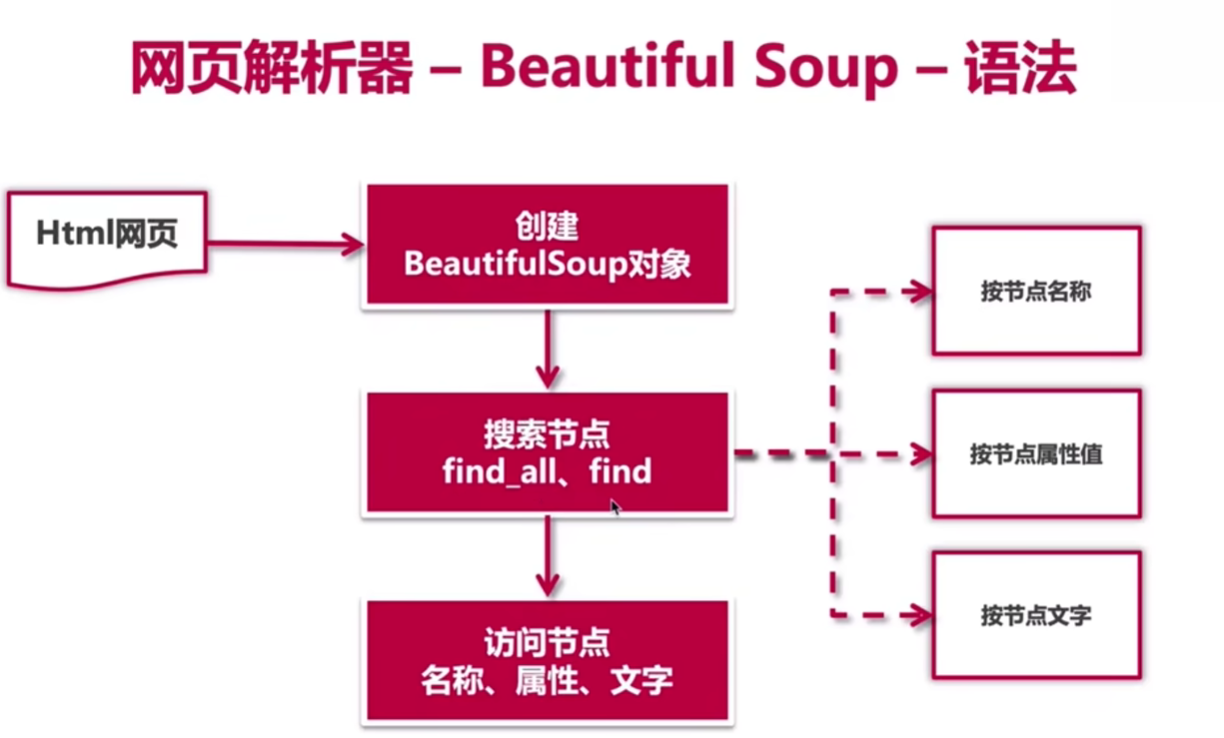

In [11]:
html_doc = """
<html>
<head>
<title>我的网页</title>
</head>
<body>
<h1>欢迎来到我的网页</h1>
<p>这是一个简单的示例。</p>
</body>
</html>
"""
from bs4 import BeautifulSoup

# 根据html网页字符串创建BeautifulSoup对象
soup = BeautifulSoup(
    html_doc, # HTML文档字符串
    'html.parser', # HTML解析器
    from_encoding='utf-8' # HTML文档编码
)


D:\anaconda\envs\cc2\lib\site-packages\bs4\__init__.py:228: UserWarning: You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.
  warnings.warn("You provided Unicode markup but also provided a value for from_encoding. Your from_encoding will be ignored.")


In [15]:
# 搜索节点
#  方法：find_all(name,attrs,string)

# 查找所有标签为a的节点
soup.find_all('a')

# 查找所有标签为a，链接符合/view/123.html形式的节点
soup.find_all('a',href='/view/123.html')

# 查找所有标签为div，class为abc，文字为Python的节点
soup.find_all('div',class_='abc',string='Python')

[]

In [17]:
# 访问节点信息

# 得到节点：<a href='1.html'>Python</a>

# 获取查找到的节点的标签名称
## node.name

# 获取查找到的a节点的href属性
## node['href']

# 获取查找到的a节点的链接文字
## node.get_text()

## 5.1 实例

In [2]:
from bs4 import BeautifulSoup

with open("html.html", encoding="utf-8") as f:
    html_doc = f.read()
    
soup = BeautifulSoup(html_doc, "html.parser")

div_node = soup.find("div", id="content")
print(div_node)

print("#"*30)

links = div_node.find_all("a")
for link in links:
    print(link.name, link["href"],link.get_text())

img = div_node.find("img")
print(img["src"])

<div class="default" id="content">
<p>段落</p>
<a href="http://www.baidu.com">百度</a><br/>
<a href="http://www.crazyant.net">蚂蚁</a><br/>
<a href="http://www.iqiyi.com">爱奇艺</a><br/>
<img src="http://www.python.org/static/img/python-logo.png"/>
</div>
##############################
a http://www.baidu.com 百度
a http://www.crazyant.net 蚂蚁
a http://www.iqiyi.com 爱奇艺
http://www.python.org/static/img/python-logo.png
